###  Задача 1. (2 балла)
Позволяет ли предсказывать корректные вероятности:

1) квадратичная функция потерь $L(y, z) =(y-z)^2$, 

2) экспоненциальная функция потерь $L(y, z) = \exp(-yz)$ ?

### Задача 1.
Для предсказания корректной вероятности необходимо, чтобы функция потерь удовлетворяла следующему условию. 

$ \underset{b \in R}{\operatorname{argmin E}} [L(y,z)|x] = p(y = +1|x)  $

#### 1) Квадратичная функция потерь 
Используем для положительных объектов метку y = 1, а для отрицательных y = 0. Покажем, что $L(y,b) = ([y = +1 - b)^2$ предсказывает корректные вероятности.
Запишем матожидание функции потерь в точке x: 


$$ E[L(y,b)|x] = p(y=+1|x)(b-1)^2 + (1-p(y=+1|x))(b-0)^2$$

Теперь продифференцируем по b: 

$$\frac{\partial}{\partial b}E[L(y,b)|x] = 2*p(y=+1|x)(b-1) + 2*(1-p(y=+1|x))*b = 2b - 2p(y=+1|x) = 0$$

Соответственно, оптимальным ответом алгоритма действительно будет

$$b = p(y=+1|x)$$

#### 2) Экспоненциальная функция потерь 
Используем для положительных объектов метку y = 1, а для отрицательных y = 0. Покажем, что $L(y,b) = \exp(-yb)$ предсказывает некорректные вероятности.

$$ E[L(y,b)|x] = p(y=+1|x)\exp(-b) + (1-p(y=+1|x))\exp(b)$$

Теперь продифференцируем по b: 

$$\frac{\partial}{\partial b}E[L(y,b)|x] = -b*p(y=+1|x)\exp(b) = 0$$

Получается, что оптимальный ответ алгоритма всегда равен 0, что некорректно.

Воспользуемся метками y = 1 для положительных объектов и y = -1 для отрицательных.

$$ E[L(y,b)|x] = p(y=+1|x)\exp(-b) + (1-p(y=+1|x))\exp(b)$$

Теперь продифференцируем по b: 

$$\frac{\partial}{\partial b}E[L(y,b)|x] = -p(y=+1|x)\exp(-b) + (1-p(y=+1|x))\exp(b) = (1-p(y=+1|x))\exp(b)-p(y=+1|x)\exp(-b)) = 
p(y=+1|x)(\exp(b)-\exp(-b))+\exp(b) = 0$$

Отсюда $p(y=+1|x)=\frac{-\exp(b)}{-\exp(b)-\exp(-b)} = 1 - \frac{1}{\exp(2b)+1}$
$$b = 0.5\ln(\frac{1}{1-p(y=+1|x)}-1)$$

Соответственно, ответ алгоритма не совпадает с вероятностью принадлежности к классу y=1. Экспоненциальная функция потерь некорректна.

### Задача 2.  (2 балла)
Рассмотрим два вектора, $v_1=(1,1,2)$ и $v_2=(1,1,1)$. Переход в спрямляющее пространство осуществляется с помощью гауссовской ядерной функции $K(v,v {'})=\exp(-\gamma|v-v{'}|^2)$.
*  Как от $\gamma$ зависят длины векторов в спрямляющем пространстве?
*  Как от $\gamma$ зависит угол между векторами в спрямляющем пространстве?

#### Длины векторов
Длину вектора в спрямляющем пространстве можно задать следующей формулой $$ ||\phi(x)|| =  \sqrt{||\phi(x)||^2} = \sqrt{(\phi(x),\phi(x))} = \sqrt{K(x,x)}$$
Соответственно, $\sqrt{K(x,x)}=\sqrt{\exp(-\gamma*0)}$ при $\forall \gamma$ длина вектора в спрямляющем пространстве будет равна 1.
#### Угол между векторами
Найдём скалярное произведение между двумя векторами в спрямляющем пространстве
$$(\phi(x),\phi(y)) = K(x,y) $$
Угол $\alpha$ между двумя векторами:
$$\alpha = arccos(\frac{K(x,y)}{\sqrt{K(x,x)}\sqrt{K(y,y)}}) = arccos(K(x,y))$$
В нашем случае
$$\alpha = arccos(\exp(-\gamma|v-v{'}|^2))$$
Соответственно, при $\gamma < 0$ и увеличении $\gamma$ по абсолютному значению угол уменьшается. при $\gamma > 0$ и увеличении $\gamma$ угол увеличивается.

### Задача 3. (2 балла) 

Является ли функция $K(x,z)=\cos(x-z)$ ядром?

Воспользуемся формулой косинуса разности: $\cos(x-z) = \cos(x)\cos(z) + \sin(x)\sin(z)$
Теперь воспользуемся следующими способами образования ядра.

#### 1. 
$K(x,z) = f(x) \cdot f(z)$ , где $f(x):X -> R$ является ядром.
#### 2.
Если $K_1(x,z)$ и $K_2(x,z)$ - ядра на множестве $X$, то $K(x,z)$: $K(x,z) = K_1(x,z)+K_2(x,z)$ также является ядром.

Таким образом, $K_1(x,z) = \cos(x) \cdot \cos(z)$ и $K_2(x,z) = \sin(x) \cdot \sin(z)$ являются ядрами по первому правилу. А наша исходная функция $K(x,z) = \cos(x-z) = \cos(x)\cos(z) + \sin(x)\sin(z) = K_1(x,z) + K_2(x,z)$ является ядром по второму правилу.

$K(x,z)=\cos(x-z)$ является ядром.

### Задача 4. (4 балла)

In [1]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


Сгенерируем синтетические данные:

In [2]:
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

####  1. Обучите метод опорных векторов. Воспользуйтесь классом [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).

In [3]:
from sklearn.svm import LinearSVC

In [7]:
clf = LinearSVC(max_iter = 1e4)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000.0,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### 2. Чему равны доля верных предсказаний, точность, полнота и F-мера классификатора? 

In [9]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn import metrics

print ('Accuracy =', metrics.accuracy_score(y_test, y_pred))
print ('Precision =', metrics.precision_score(y_test, y_pred))
print ('Recall =', metrics.recall_score(y_test, y_pred))
print ('F1 score =', metrics.f1_score(y_test, y_pred))

Accuracy = 0.7716666666666666
Precision = 0.7758620689655172
Recall = 0.7712590639419907
F1 score = 0.7735537190082645


#### 3.  Постройте ROC кривую. Определите AUC-ROC. 
Обратите внимание, что метод опорных векторов  не умеет predict_proba, но имеет метод decision_function.
Определите вероятности принадлежности к положительному классу как:
$$P(y=+1|x)=\frac{a(x)-\min(a_i)}{\max(a_i)-\min(a_i)}$$

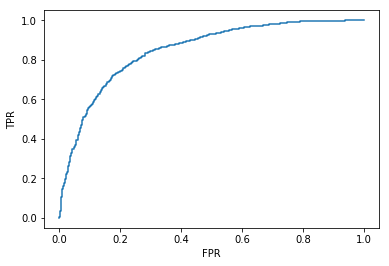

In [21]:
probs = clf.decision_function(X_test)
probs = (probs - min(probs))/(max(probs)-min(probs))

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [22]:
print('AUC-ROC = ',metrics.auc(fpr, tpr))

AUC-ROC =  0.8476457642781673


#### 4. Калибровка вероятностей.  

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. 
#### Нарисуйте для найденных вероятностей калибровочную кривую, сравните с диагональю. 
Воспользуйтесь [calibration_curve](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html).

In [23]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

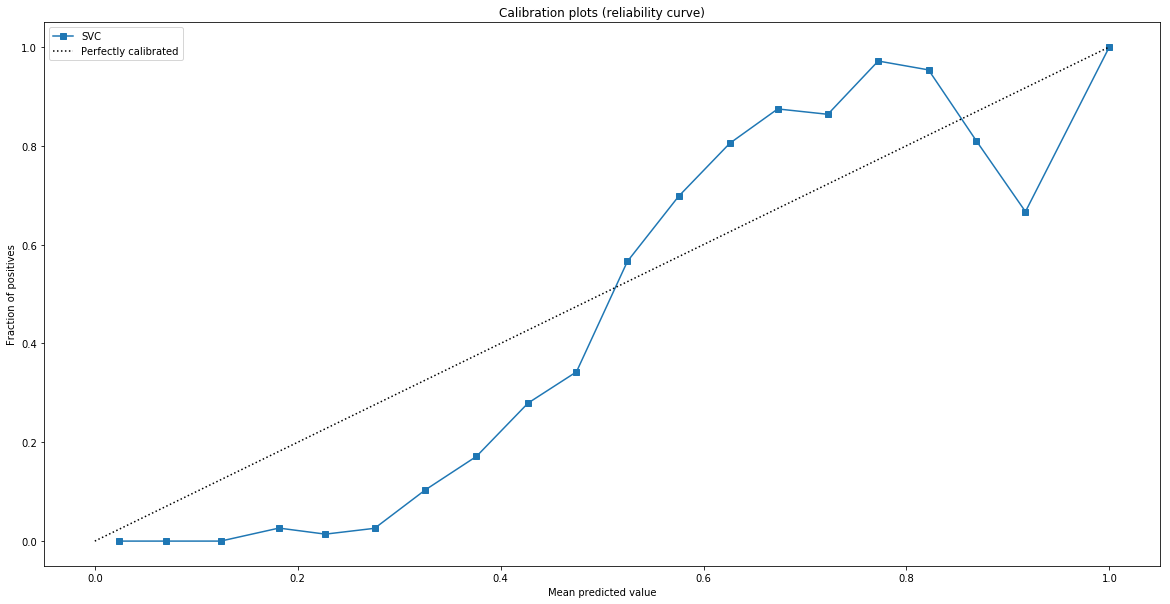

In [53]:
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, probs, n_bins=20)
plt.figure(figsize=(20,10))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="SVC")

plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
axes = plt.gca()
axes.set_ylim([-0.05, 1.05])
axes.set_title('Calibration plots (reliability curve)')
plt.legend()
plt.show()


Воспользуйтесь [CalibratedClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV)из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [56]:
calibclf = CalibratedClassifierCV()
calibclf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CalibratedClassifierCV(base_estimator=None, cv='warn', method='sigmoid')

In [57]:
probs = calibclf.predict_proba(X_test)

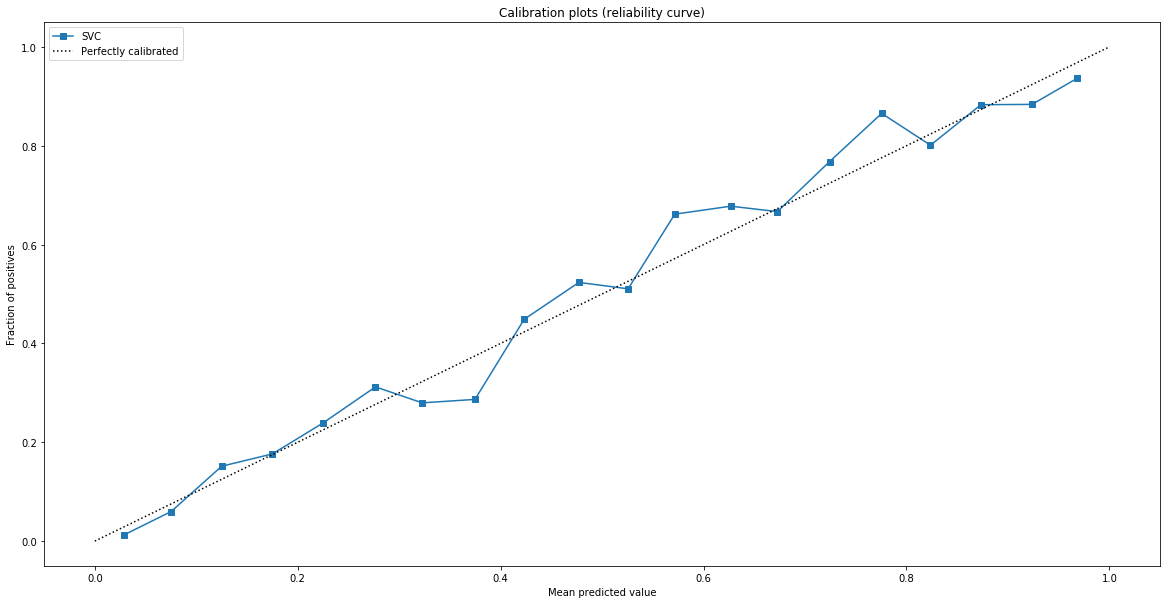

In [59]:
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, probs[:,1], n_bins=20)
plt.figure(figsize=(20,10))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="SVC")

plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
axes = plt.gca()
axes.set_ylim([-0.05, 1.05])
axes.set_title('Calibration plots (reliability curve)')
plt.legend()
plt.show()

Калибровочная кривая значительно улучшилась и стала более приблежённой к диагональной.